# **Telecom Churn Analysis**

## **1. Importing library**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **2. Reading Data from csv file**

In [ ]:
dataset = pd.read_csv('./Customer Churn.csv')

In [ ]:
dataset.head() # after dropping redundant feature or featue that do not affect the churn analysis

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


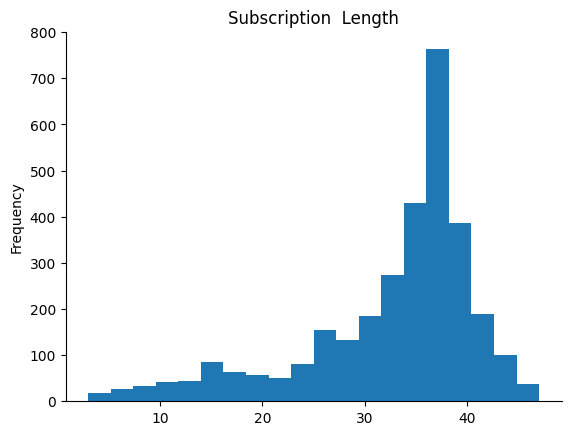

In [ ]:
# @title Subscription  Length

from matplotlib import pyplot as plt
dataset['Subscription  Length'].plot(kind='hist', bins=20, title='Subscription  Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **3. Separating in features and target**

In [ ]:
x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

## **4. Dividing data in training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

## **5. Normalizing**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_normalizer = StandardScaler()

x_train = sc_normalizer.fit_transform(x_train)
x_test = sc_normalizer.transform(x_test)

## **6. Implementing Model - Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

learning_rate = 0.001

classifier = Sequential()
classifier.add(Dense(units = 8, kernel_initializer = 'random_normal', activation = 'leaky_relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'random_normal', activation = 'leaky_relu'))
classifier.add(Dense(units = 8, kernel_initializer = 'random_normal', activation = 'leaky_relu'))
classifier.add(Dense(units = 4, kernel_initializer = 'random_normal', activation = 'leaky_relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'random_normal', activation = 'sigmoid'))

adam_optimizer = Adam(learning_rate=learning_rate)
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = classifier.fit(x_train, y_train, batch_size = 10, epochs = 100, validation_data=(x_test, y_test), callbacks=[early_stopping])


Epoch 1/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8458 - loss: 0.5970 - val_accuracy: 0.8922 - val_loss: 0.2632
Epoch 2/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9072 - loss: 0.2061 - val_accuracy: 0.8837 - val_loss: 0.2519
Epoch 3/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8938 - loss: 0.2205 - val_accuracy: 0.8879 - val_loss: 0.2486
Epoch 4/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9092 - loss: 0.2091 - val_accuracy: 0.8879 - val_loss: 0.2444
Epoch 5/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8991 - loss: 0.2074 - val_accuracy: 0.8879 - val_loss: 0.2419
Epoch 6/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9052 - loss: 0.1975 - val_accuracy: 0.8858 - val_loss: 0.2402
Epoch 7/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9035 - loss: 0.2029 - val_accuracy: 0.8837 - val_loss: 0.2374
Epoch 8/100
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 0.1968 - val_accu

## **7. Plotting accuracies**

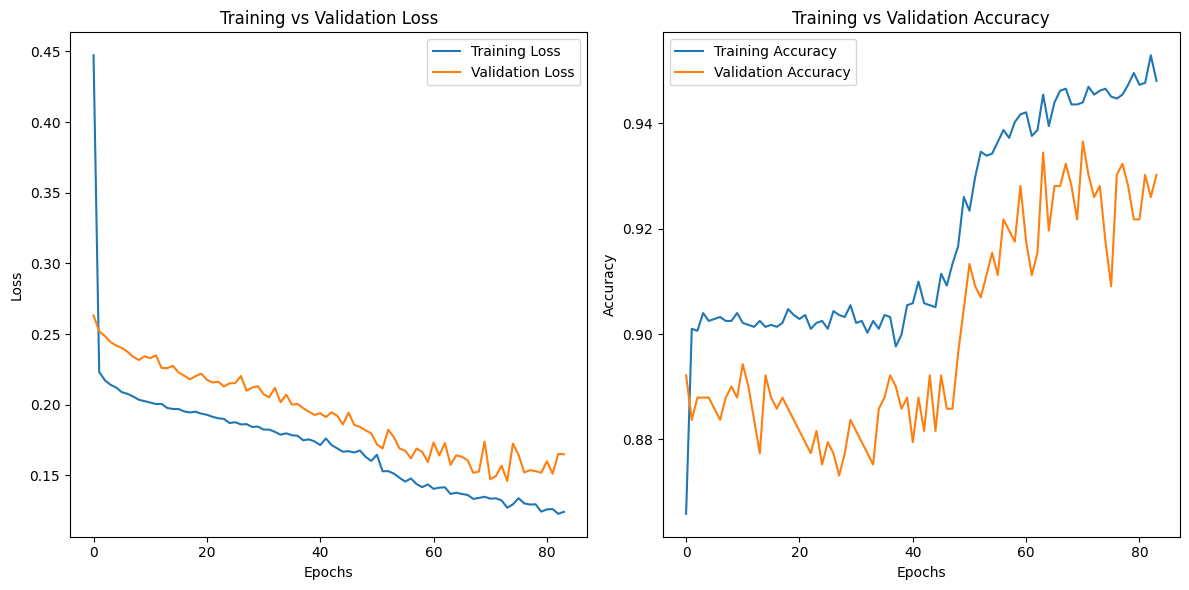

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **8. Predicted value of churn**

In [ ]:
y_pred = classifier.predict(x_test)
for i in range(len(y_pred)):
  if y_pred[i] > 0.5:
    y_pred[i] = int(1)
  else:
    y_pred[i] = int(0)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
y_pred = y_pred.astype(np.int64)

In [ ]:
y_pred.size

473

In [ ]:
y_test.size

473

## **9. Calculating Error**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)

In [ ]:
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

error_rate = (FP + FN) / (TP + TN + FP + FN)
print(f'Error Rate: {error_rate:.2f}')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Error Rate: 0.07
Accuracy: 0.93
Precision: 0.77
Recall: 0.85
F1 Score: 0.81


## **10. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

logistic_model = LogisticRegression(random_state=0, max_iter=1000)

logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)
y_pred_probs = logistic_model.predict_proba(x_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.88
ROC-AUC Score: 0.93
Confusion Matrix:
[[510  11]
 [ 63  46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       521
           1       0.81      0.42      0.55       109

    accuracy                           0.88       630
   macro avg       0.85      0.70      0.74       630
weighted avg       0.88      0.88      0.87       630



## **11. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
random_forest_model.fit(x_train, y_train)

# Predict the test set results
y_pred = random_forest_model.predict(x_test)
y_pred_probs = random_forest_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Feature Importance
importances = random_forest_model.feature_importances_
print("\nFeature Importances:")
for i, imp in enumerate(importances):
    print(f"Feature {i}: {imp:.4f}")

Accuracy: 0.95
ROC-AUC Score: 0.98
Confusion Matrix:
[[512   9]
 [ 24  85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       521
           1       0.90      0.78      0.84       109

    accuracy                           0.95       630
   macro avg       0.93      0.88      0.90       630
weighted avg       0.95      0.95      0.95       630


Feature Importances:
Feature 0: 0.0573
Feature 1: 0.2029
Feature 2: 0.1108
Feature 3: 0.0192
Feature 4: 0.1188
Feature 5: 0.1121
Feature 6: 0.0483
Feature 7: 0.0704
Feature 8: 0.0306
Feature 9: 0.0010
Feature 10: 0.1152
Feature 11: 0.0291
Feature 12: 0.0842


## **12. SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the SVM model with a probability output
svm_model = SVC(kernel='rbf', probability=True, random_state=0)

# Train the model
svm_model.fit(x_train, y_train)

# Predict the test set results
y_pred = svm_model.predict(x_test)
y_pred_probs = svm_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.91
ROC-AUC Score: 0.96
Confusion Matrix:
[[517   4]
 [ 54  55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       521
           1       0.93      0.50      0.65       109

    accuracy                           0.91       630
   macro avg       0.92      0.75      0.80       630
weighted avg       0.91      0.91      0.90       630



## **13. KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

# Train the model
knn_model.fit(x_train, y_train)

# Predict the test set results
y_pred = knn_model.predict(x_test)
y_pred_probs = knn_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.94
ROC-AUC Score: 0.97
Confusion Matrix:
[[507  14]
 [ 23  86]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       521
           1       0.86      0.79      0.82       109

    accuracy                           0.94       630
   macro avg       0.91      0.88      0.89       630
weighted avg       0.94      0.94      0.94       630



## **14. Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(x_train, y_train)

# Predict the test set results
y_pred = nb_model.predict(x_test)
y_pred_probs = nb_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.73
ROC-AUC Score: 0.91
Confusion Matrix:
[[360 161]
 [  8 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       521
           1       0.39      0.93      0.54       109

    accuracy                           0.73       630
   macro avg       0.68      0.81      0.68       630
weighted avg       0.88      0.73      0.76       630



## **15. Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

# Initialize Linear Regression
linear_model = LinearRegression()

# Train the model
linear_model.fit(x_train, y_train)

# Predict probabilities for test set
y_pred_probs = linear_model.predict(x_test)

# Convert probabilities to binary classes (threshold = 0.5)
y_pred = (y_pred_probs >= 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.88
ROC-AUC Score: 0.93
Confusion Matrix:
[[513   8]
 [ 66  43]]


## **16. LDA**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the LDA model
lda_model = LinearDiscriminantAnalysis()

# Train the model
lda_model.fit(x_train, y_train)

# Predict the test set results
y_pred = lda_model.predict(x_test)
y_pred_probs = lda_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.88
ROC-AUC Score: 0.93
Confusion Matrix:
[[512   9]
 [ 65  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       521
           1       0.83      0.40      0.54       109

    accuracy                           0.88       630
   macro avg       0.86      0.69      0.74       630
weighted avg       0.88      0.88      0.87       630



## **17. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=0)

# Train the model
dt_model.fit(x_train, y_train)

# Predict the test set results
y_pred = dt_model.predict(x_test)
y_pred_probs = dt_model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class (churn=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_probs)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.92
ROC-AUC Score: 0.86
Confusion Matrix:
[[503  18]
 [ 31  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       521
           1       0.81      0.72      0.76       109

    accuracy                           0.92       630
   macro avg       0.88      0.84      0.86       630
weighted avg       0.92      0.92      0.92       630



## **18. Comparison**

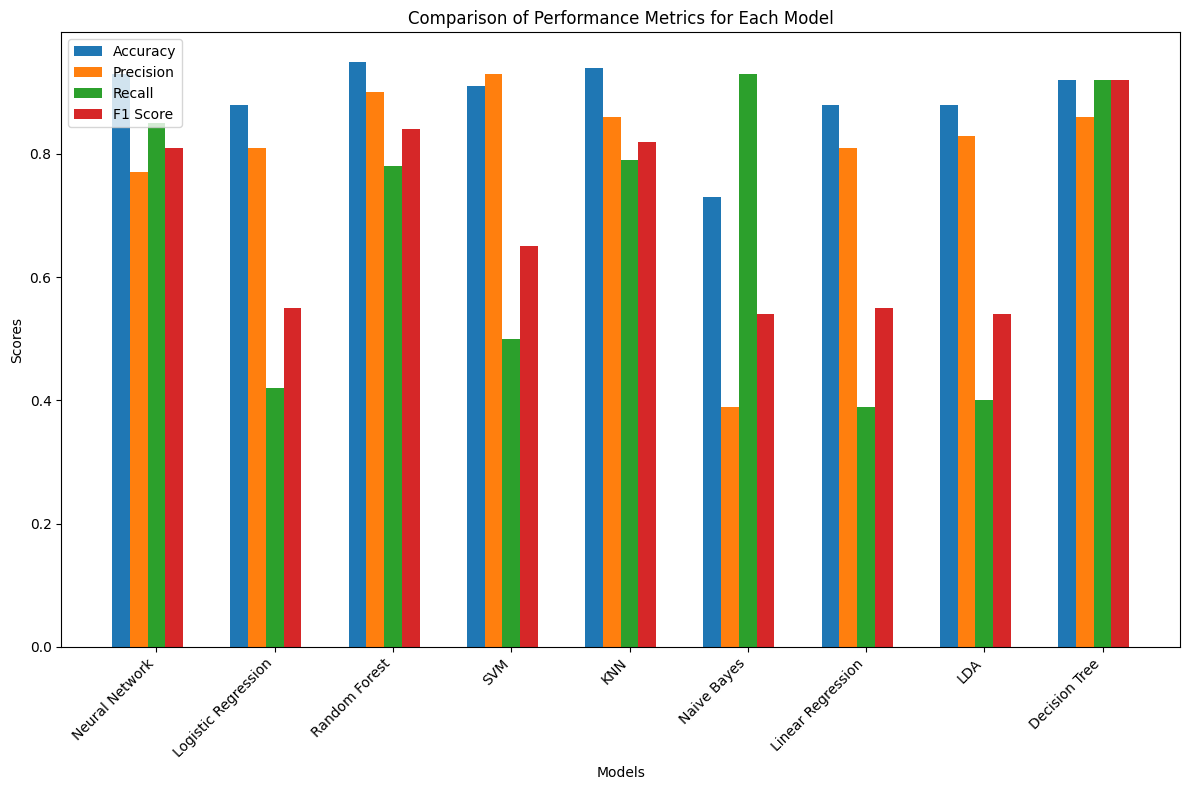

In [ ]:
# Model names
models = ['Neural Network', 'Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Naive Bayes', 'Linear Regression', 'LDA', 'Decision Tree']

# Metrics for each model
accuracy = [0.93, 0.88, 0.95, 0.91, 0.94, 0.73, 0.88, 0.88, 0.92]
precision = [0.77, 0.81, 0.90, 0.93, 0.86, 0.39, 0.81, 0.83, 0.86]
recall = [0.85, 0.42, 0.78, 0.50, 0.79, 0.93, 0.39, 0.40, 0.92]
f1_score = [0.81, 0.55, 0.84, 0.65, 0.82, 0.54, 0.55, 0.54, 0.92]
roc_auc = [0.93, 0.93, 0.98, 0.96, 0.97, 0.91, 0.93, 0.93, 0.86]

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.15
index = np.arange(len(models))

# Plotting each metric as a separate bar group
ax.bar(index - bar_width*2, accuracy, bar_width, label='Accuracy')
ax.bar(index - bar_width, precision, bar_width, label='Precision')
ax.bar(index, recall, bar_width, label='Recall')
ax.bar(index + bar_width, f1_score, bar_width, label='F1 Score')
# ax.bar(index + bar_width*2, roc_auc, bar_width, label='ROC-AUC')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Performance Metrics for Each Model')
ax.set_xticks(index)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

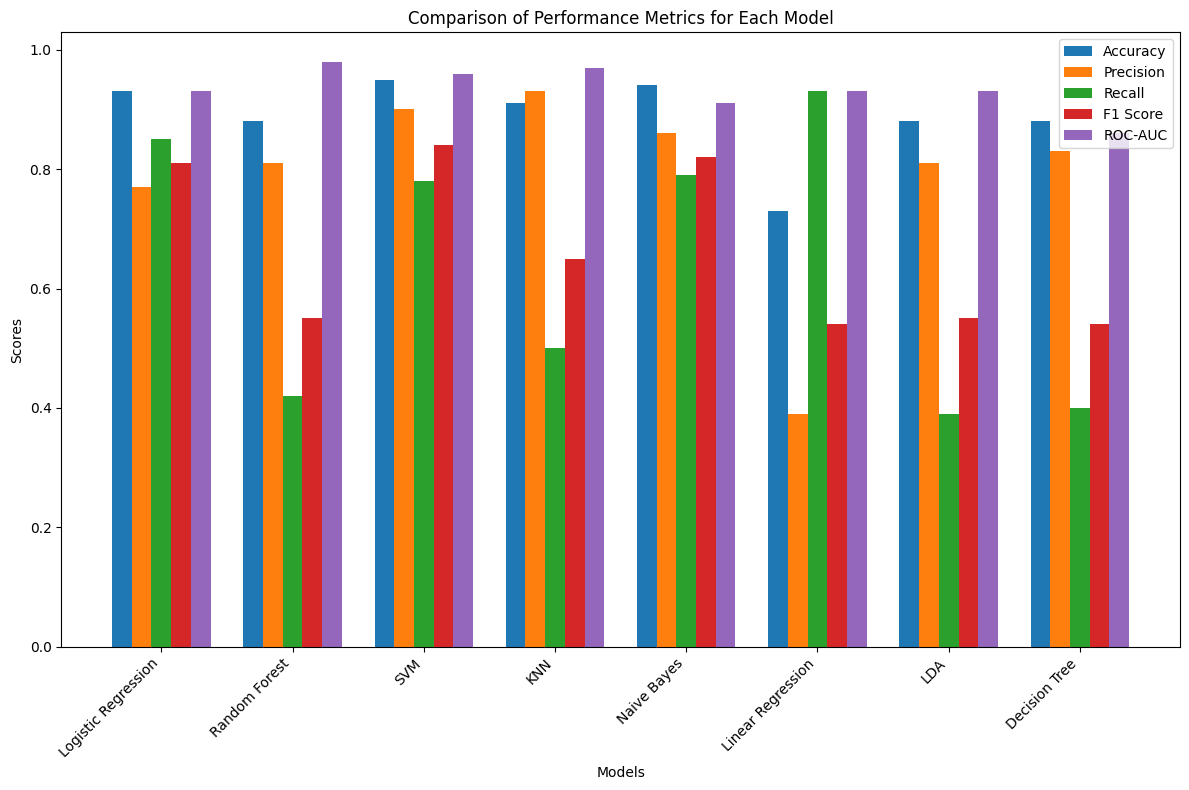

In [ ]:
# Removing ROC-AUC values for models where it's not available
roc_auc = [None, 0.93, 0.98, 0.96, 0.97, 0.91, 0.93, 0.93, 0.86]

# Updating the data to remove None values for ROC-AUC
roc_auc_filtered = [x for x in roc_auc if x is not None]
models_filtered = [model for model, roc in zip(models, roc_auc) if roc is not None]

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Set the bar width
bar_width = 0.15
index = np.arange(len(models_filtered))

# Plotting each metric as a separate bar group
ax.bar(index - bar_width*2, accuracy[:len(models_filtered)], bar_width, label='Accuracy')
ax.bar(index - bar_width, precision[:len(models_filtered)], bar_width, label='Precision')
ax.bar(index, recall[:len(models_filtered)], bar_width, label='Recall')
ax.bar(index + bar_width, f1_score[:len(models_filtered)], bar_width, label='F1 Score')
ax.bar(index + bar_width*2, roc_auc_filtered, bar_width, label='ROC-AUC')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Performance Metrics for Each Model')
ax.set_xticks(index)
ax.set_xticklabels(models_filtered, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()